In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

<b style="color:lightgreen"><i>Data Exploration and Cleaning</i></b>

In [2]:
df = pd.read_csv("telcom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df1 = df.drop(['customerID'], axis=1)
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
def unique_data_in_each_col(df):
    for columns in df:
        if df[columns].dtypes == object:
            print(f'{columns}: {df[columns].unique()}') 
        
unique_data_in_each_col(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [6]:
df1.gender.replace({'Female':0, 'Male':1}, inplace=True)
df1.gender

0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    1
Name: gender, Length: 7043, dtype: int64

In [7]:
df1.replace({'No internet service':'No', 'No phone service':'No'}, inplace=True)
unique_data_in_each_col(df1)

Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [8]:
colm_y_n = ['Partner', 'Dependents', 'PhoneService','MultipleLines', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in colm_y_n:
    df1[col].replace({'Yes':1, 'No':0}, inplace=True)

In [9]:
unique_data_in_each_col(df1)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [10]:
#df1.TotalCharges= pd.to_numeric(df1.TotalCharges)

In [11]:
# from the above cell we get to know that, some of the value in TotalCharges column is filled with " " string. So, first we are going to make them NaN using the below command, then we will remove the rows with NaN value
df1.TotalCharges= pd.to_numeric(df1.TotalCharges, errors='coerce')

In [12]:
df2 = df1[~df1.TotalCharges.isnull()]

In [13]:
df2.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
unique_data_in_each_col(df2)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [15]:
df3 = pd.get_dummies(data=df2, columns=['InternetService','Contract','PaymentMethod'], drop_first=True)

In [16]:
df3

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,84.80,1990.50,0,0,0,1,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,103.20,7362.90,0,1,0,1,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,29.60,346.45,0,0,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,74.40,306.60,1,1,0,0,0,0,0,1


In [17]:
df3.shape

(7032, 24)

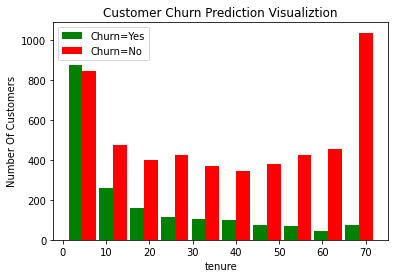

In [18]:
tenure_churn_no = df2[df2.Churn==0].tenure
tenure_churn_yes = df2[df2.Churn==1].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.90, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

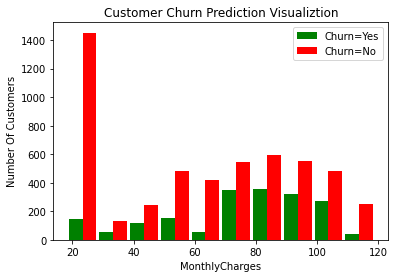

In [19]:
monthly_charges_churn_no = df2[df2.Churn==0].MonthlyCharges
monthly_charges_churn_yes = df2[df2.Churn==1].MonthlyCharges

plt.xlabel("MonthlyCharges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([monthly_charges_churn_yes, monthly_charges_churn_no], rwidth=0.90, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

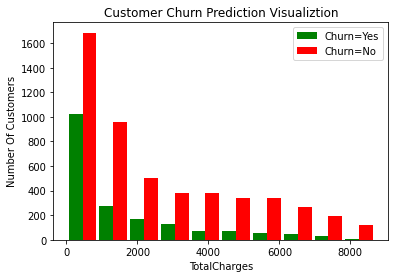

In [20]:
total_charges_churn_no = df2[df2.Churn==0].TotalCharges
total_charges_churn_yes = df2[df2.Churn==1].TotalCharges

plt.xlabel("TotalCharges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([total_charges_churn_yes, total_charges_churn_no], rwidth=0.90, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [21]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3[cols_to_scale] = scaler.fit_transform(df3[cols_to_scale])

In [22]:
x = df3.drop('Churn', axis=1)
y = df3.Churn

In [23]:
x.shape

(7032, 23)

In [24]:
y.shape

(7032,)

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

In [26]:
x_train.shape

(5625, 23)

In [27]:
x_test.shape

(1407, 23)

In [28]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1413,1,0,1,1,0.901408,1,1,1,1,1,...,0,0.759204,0.699279,1,0,0,1,1,0,0
7003,1,0,0,0,0.352113,0,0,0,0,1,...,0,0.174129,0.115820,0,0,0,0,0,1,0
3355,0,0,1,0,0.943662,1,1,0,1,1,...,0,0.715920,0.724538,1,0,0,1,1,0,0
4494,1,0,0,0,0.028169,1,0,0,1,0,...,0,0.657214,0.024954,1,0,0,0,0,1,0
3541,0,0,1,0,0.676056,0,0,1,0,0,...,0,0.222886,0.236782,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,1,1,1,0,0.901408,1,0,0,0,0,...,1,0.524378,0.523471,1,0,1,0,0,0,0
5123,0,1,0,0,0.197183,1,0,0,1,0,...,1,0.567662,0.130239,1,0,0,0,1,0,0
4135,0,0,1,1,0.492958,1,1,1,1,1,...,1,0.742786,0.387774,0,0,0,1,1,0,0
4249,0,0,1,1,0.126761,1,0,0,1,1,...,1,0.474129,0.073996,0,0,1,0,0,0,1


In [29]:
x_train.shape

(5625, 23)

In [30]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [31]:
y_test.value_counts()

0    1033
1     374
Name: Churn, dtype: int64

In [32]:
from sklearn.metrics import classification_report

In [33]:
def ANN_model(x_train, x_test, y_train, y_test):
    
    model = keras.Sequential([
        keras.layers.Dense(20,input_shape=(23,), activation='relu'),
        keras.layers.Dense(15,activation='relu'),
        keras.layers.Dense(5, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    model.fit(x_train, y_train, epochs=50)
    
    print(model.evaluate(x_test, y_test))
    
    y_pred = model.predict(x_test)
    y_pred=np.round(y_pred)
    
    print("Classification Report: \n", classification_report(y_test, y_pred))
    
    return y_pred

In [34]:
# appllying the model directly on imbalance data:
ANN_model(x_train,x_test, y_train, y_test)

Epoch 1/50
176/176 [==============================] - 3s 5ms/step - loss: 0.5053 - accuracy: 0.7412
Epoch 2/50
176/176 [==============================] - 1s 6ms/step - loss: 0.4327 - accuracy: 0.7899
Epoch 3/50
176/176 [==============================] - 1s 5ms/step - loss: 0.4237 - accuracy: 0.7996
Epoch 4/50
176/176 [==============================] - 1s 5ms/step - loss: 0.4186 - accuracy: 0.8011
Epoch 5/50
176/176 [==============================] - 1s 5ms/step - loss: 0.4169 - accuracy: 0.8032
Epoch 6/50
176/176 [==============================] - 1s 5ms/step - loss: 0.4154 - accuracy: 0.8018
Epoch 7/50
176/176 [==============================] - 1s 6ms/step - loss: 0.4118 - accuracy: 0.8053
Epoch 8/50
176/176 [==============================] - 1s 5ms/step - loss: 0.4104 - accuracy: 0.8091
Epoch 9/50
176/176 [==============================] - 1s 5ms/step - loss: 0.4080 - accuracy: 0.8075
Epoch 10/50
176/176 [==============================] - 1s 5ms/step - loss: 0.4084 - accuracy: 0.8098

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

We have seen that our training data is not-balanced, this results to a biased training. </br>
So, there are four methods to deal with such data:
1. Random Under-Sampling
2. Random Over-Sampling
3. SMOTE (Python imbalanced-learn module)
4. Ensable with undersampling

<b style="color:lightgreen"><i>1. Random Under Sampeling</i></b>

In [35]:
class0_count, class1_count = df3.Churn.value_counts()
class0_count, class1_count

(5163, 1869)

In [36]:
df_class0 = df3[df3.Churn==0]
df_class1 = df3[df3.Churn==1]

df_class0_under = df_class0.sample(class1_count)
df_class0_under.shape 

(1869, 24)

In [37]:
df_under = pd.concat([df_class0_under, df_class1], axis=0)

x1=df_under.drop('Churn', axis=1)
y1=df_under['Churn']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42, stratify=y1)

In [38]:
y1_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [39]:
y1_pred = ANN_model(x1_train, x1_test, y1_train, y1_test)

Epoch 1/50
94/94 [==============================] - 2s 5ms/step - loss: 0.6697 - accuracy: 0.5749
Epoch 2/50
94/94 [==============================] - 0s 5ms/step - loss: 0.6051 - accuracy: 0.7298
Epoch 3/50
94/94 [==============================] - 0s 4ms/step - loss: 0.5408 - accuracy: 0.7579
Epoch 4/50
94/94 [==============================] - 0s 5ms/step - loss: 0.5037 - accuracy: 0.7605
Epoch 5/50
94/94 [==============================] - 1s 5ms/step - loss: 0.4898 - accuracy: 0.7619
Epoch 6/50
94/94 [==============================] - 0s 5ms/step - loss: 0.4863 - accuracy: 0.7622
Epoch 7/50
94/94 [==============================] - 1s 6ms/step - loss: 0.4831 - accuracy: 0.7672
Epoch 8/50
94/94 [==============================] - 0s 5ms/step - loss: 0.4780 - accuracy: 0.7676
Epoch 9/50
94/94 [==============================] - 0s 4ms/step - loss: 0.4777 - accuracy: 0.7702
Epoch 10/50
94/94 [==============================] - 0s 5ms/step - loss: 0.4754 - accuracy: 0.7729
Epoch 11/50
94/94 [

<b style="color:lightgreen"><i>2. Random Over Sampling</i></b>

In [40]:
'''
here we are not making a new dataframe, because we may have duplicates of training data into test data. So, we are just oversampling the data of training data i.e., x_train, y_train  
'''

x = df3
y = df3['Churn']
x2_tr, x2_test, y2_tr, y2_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

In [41]:
y2_tr.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [42]:
from dataclasses import replace


df_class0 = x2_tr[x2_tr.Churn==0]
df_class1 = x2_tr[x2_tr.Churn==1]

df_class1_over = df_class1.sample(4130, replace=True)

df_over = pd.concat([df_class0, df_class1_over], axis=0)

In [43]:
x2_train=df_over.drop('Churn', axis=1)
y2_train=df_over['Churn']
x2_test=x2_test.drop('Churn', axis=1)

In [44]:
y2_pred = ANN_model(x2_train, x2_test, y2_train, y2_test)

Epoch 1/50
259/259 [==============================] - 4s 5ms/step - loss: 0.5926 - accuracy: 0.6977
Epoch 2/50
259/259 [==============================] - 1s 5ms/step - loss: 0.4977 - accuracy: 0.7642
Epoch 3/50
259/259 [==============================] - 1s 4ms/step - loss: 0.4891 - accuracy: 0.7703
Epoch 4/50
259/259 [==============================] - 1s 5ms/step - loss: 0.4837 - accuracy: 0.7694
Epoch 5/50
259/259 [==============================] - 1s 5ms/step - loss: 0.4791 - accuracy: 0.7718
Epoch 6/50
259/259 [==============================] - 1s 5ms/step - loss: 0.4770 - accuracy: 0.7711
Epoch 7/50
259/259 [==============================] - 1s 5ms/step - loss: 0.4731 - accuracy: 0.7715
Epoch 8/50
259/259 [==============================] - 1s 5ms/step - loss: 0.4713 - accuracy: 0.7732
Epoch 9/50
259/259 [==============================] - 1s 5ms/step - loss: 0.4672 - accuracy: 0.7755
Epoch 10/50
259/259 [==============================] - 1s 5ms/step - loss: 0.4661 - accuracy: 0.7780

<b style="color:lightgreen"><i>3. SMOTE (imbalanced-learn modeule)</i></b>

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [47]:
x_sm = x_sm.drop('Churn', axis=1)

In [48]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)
y3_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [49]:
y3_pred = ANN_model(x3_train, x3_test, y3_train, y3_test)

Epoch 1/50
259/259 [==============================] - 3s 5ms/step - loss: 0.6089 - accuracy: 0.6835
Epoch 2/50
259/259 [==============================] - 1s 4ms/step - loss: 0.5316 - accuracy: 0.7857
Epoch 3/50
259/259 [==============================] - 1s 5ms/step - loss: 0.5070 - accuracy: 0.7862
Epoch 4/50
259/259 [==============================] - 1s 5ms/step - loss: 0.4917 - accuracy: 0.7877
Epoch 5/50
259/259 [==============================] - 1s 5ms/step - loss: 0.4809 - accuracy: 0.7896
Epoch 6/50
259/259 [==============================] - 1s 5ms/step - loss: 0.4728 - accuracy: 0.7872
Epoch 7/50
259/259 [==============================] - 1s 5ms/step - loss: 0.4657 - accuracy: 0.7920
Epoch 8/50
259/259 [==============================] - 1s 5ms/step - loss: 0.4601 - accuracy: 0.7921
Epoch 9/50
259/259 [==============================] - 1s 5ms/step - loss: 0.4552 - accuracy: 0.7916
Epoch 10/50
259/259 [==============================] - 1s 6ms/step - loss: 0.4510 - accuracy: 0.7935

<b style="color:lightgreen"><i>4. Ensamble under-Sampling</i></b>

In [50]:
x4_train, x4_test, y4_train, y4_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
y4_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [51]:
# Dividing the training data as:
1377 + 1377 + 1376

4130

In [52]:
x4_test=x4_test.drop('Churn', axis=1)

In [53]:
df__class0 = x4_train[x4_train.Churn==0]
df__class1 = x4_train[x4_train.Churn==1]
df__class0.shape, df__class1.shape

((4130, 24), (1495, 24))

In [54]:
def get_traing_data(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    x_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return x_train, y_train

In [55]:
x_train, y_train = get_traing_data(df__class0, df__class1, 0, 1374)
y_pred1 = ANN_model(x_train, x4_test, y_train, y4_test)

Epoch 1/50
90/90 [==============================] - 3s 6ms/step - loss: 0.6615 - accuracy: 0.6466
Epoch 2/50
90/90 [==============================] - 0s 4ms/step - loss: 0.5512 - accuracy: 0.7435
Epoch 3/50
90/90 [==============================] - 0s 5ms/step - loss: 0.5061 - accuracy: 0.7543
Epoch 4/50
90/90 [==============================] - 0s 5ms/step - loss: 0.4940 - accuracy: 0.7637
Epoch 5/50
90/90 [==============================] - 0s 5ms/step - loss: 0.4899 - accuracy: 0.7619
Epoch 6/50
90/90 [==============================] - 0s 4ms/step - loss: 0.4876 - accuracy: 0.7630
Epoch 7/50
90/90 [==============================] - 0s 5ms/step - loss: 0.4816 - accuracy: 0.7727
Epoch 8/50
90/90 [==============================] - 0s 5ms/step - loss: 0.4782 - accuracy: 0.7717
Epoch 9/50
90/90 [==============================] - 0s 5ms/step - loss: 0.4747 - accuracy: 0.7734
Epoch 10/50
90/90 [==============================] - 0s 5ms/step - loss: 0.4738 - accuracy: 0.7773
Epoch 11/50
90/90 [

In [58]:
x_train, y_train = get_traing_data(df__class0, df__class1, 1374, 2747)
y_pred2 = ANN_model(x_train, x4_test, y_train, y4_test)

Epoch 1/50
90/90 [==============================] - 2s 5ms/step - loss: 0.6601 - accuracy: 0.6423
Epoch 2/50
90/90 [==============================] - 0s 4ms/step - loss: 0.5571 - accuracy: 0.7517
Epoch 3/50
90/90 [==============================] - 0s 6ms/step - loss: 0.5016 - accuracy: 0.7650
Epoch 4/50
90/90 [==============================] - 0s 5ms/step - loss: 0.4879 - accuracy: 0.7702
Epoch 5/50
90/90 [==============================] - 0s 5ms/step - loss: 0.4834 - accuracy: 0.7748
Epoch 6/50
90/90 [==============================] - 0s 5ms/step - loss: 0.4794 - accuracy: 0.7713
Epoch 7/50
90/90 [==============================] - 0s 5ms/step - loss: 0.4762 - accuracy: 0.7758
Epoch 8/50
90/90 [==============================] - 0s 5ms/step - loss: 0.4747 - accuracy: 0.7737
Epoch 9/50
90/90 [==============================] - 1s 6ms/step - loss: 0.4722 - accuracy: 0.7755
Epoch 10/50
90/90 [==============================] - 0s 5ms/step - loss: 0.4708 - accuracy: 0.7758
Epoch 11/50
90/90 [

In [59]:
x_train, y_train = get_traing_data(df__class0, df__class1, 2747, 4130)
y_pred3 = ANN_model(x_train, x4_test, y_train, y4_test)

Epoch 1/50
90/90 [==============================] - 3s 5ms/step - loss: 0.6724 - accuracy: 0.6018
Epoch 2/50
90/90 [==============================] - 0s 5ms/step - loss: 0.5772 - accuracy: 0.7338
Epoch 3/50
90/90 [==============================] - 0s 5ms/step - loss: 0.5241 - accuracy: 0.7578
Epoch 4/50
90/90 [==============================] - 1s 6ms/step - loss: 0.5050 - accuracy: 0.7578
Epoch 5/50
90/90 [==============================] - 0s 5ms/step - loss: 0.4950 - accuracy: 0.7658
Epoch 6/50
90/90 [==============================] - 0s 5ms/step - loss: 0.4918 - accuracy: 0.7644
Epoch 7/50
90/90 [==============================] - 0s 4ms/step - loss: 0.4852 - accuracy: 0.7707
Epoch 8/50
90/90 [==============================] - 0s 4ms/step - loss: 0.4822 - accuracy: 0.7721
Epoch 9/50
90/90 [==============================] - 0s 5ms/step - loss: 0.4803 - accuracy: 0.7714
Epoch 10/50
90/90 [==============================] - 0s 5ms/step - loss: 0.4781 - accuracy: 0.7735
Epoch 11/50
90/90 [

In [60]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [61]:
cl_rep = classification_report(y4_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1033
           1       0.48      0.83      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.69      1407
weighted avg       0.80      0.72      0.73      1407

